In [1]:
import math
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import re
import seaborn as sns
import pandas as pd
import random
from scipy import stats  #t-test
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from scipy.interpolate import interp1d
from itertools import groupby
import statsmodels.formula.api as smf
import statsmodels.api as sm

C:\Users\ljr\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
pathturn1 = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\facon" #2m
filesturn1= os.listdir(pathturn1)
pathturn1o = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\blockother\fa"
filesturn1o= os.listdir(pathturn1o)
pathturn1c = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\chicon"
filesturn1c= os.listdir(pathturn1c)
pathturn1co = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\blockother\chi"
filesturn1co= os.listdir(pathturn1co)

pathturn2 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\facon"#7m
filesturn2= os.listdir(pathturn2)
pathturn2o = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\blockother\fa"
filesturn2o= os.listdir(pathturn2o)
pathturn2c = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\chicon"
filesturn2c= os.listdir(pathturn2c)
pathturn2co = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\blockother\chi"
filesturn2co= os.listdir(pathturn2co)

pathturn3 = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\facon"#32m
filesturn3= os.listdir(pathturn3)
pathturn3o = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\blockother\fa"
filesturn3o= os.listdir(pathturn3o)
pathturn3c = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\chicon"
filesturn3c= os.listdir(pathturn3c)
pathturn3co = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\blockother\chi"
filesturn3co= os.listdir(pathturn3co)

pathturn4 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\facon"#36m
filesturn4= os.listdir(pathturn4)
pathturn4o = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\blockother\fa"
filesturn4o= os.listdir(pathturn4o)
pathturn4c = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\chicon"
filesturn4c= os.listdir(pathturn4c)
pathturn4co = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\blockother\chi"
filesturn4co= os.listdir(pathturn4co)

pathturn5 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\facon"#27m
filesturn5= os.listdir(pathturn5)
pathturn5o = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\blockother\fa"
filesturn5o= os.listdir(pathturn5o)
pathturn5c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\chicon"
filesturn5c= os.listdir(pathturn5c)
pathturn5co = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\blockother\chi"
filesturn5co= os.listdir(pathturn5co)

pathturn6 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\facon"#4m
filesturn6= os.listdir(pathturn6)
pathturn6o = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\blockother\fa"
filesturn6o= os.listdir(pathturn6o)
pathturn6c = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\chicon"
filesturn6c= os.listdir(pathturn6c)
pathturn6co = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\blockother\chi"
filesturn6co= os.listdir(pathturn6co)

pathturn7 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\facon"#22m
filesturn7= os.listdir(pathturn7)
pathturn7o = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\blockother\fa"
filesturn7o= os.listdir(pathturn7o)
pathturn7c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\chicon"
filesturn7c= os.listdir(pathturn7c)
pathturn7co = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\blockother\chi"
filesturn7co= os.listdir(pathturn7co)

pathturn8 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\facon"#14m
filesturn8= os.listdir(pathturn8)
pathturn8o = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\blockother\fa"
filesturn8o= os.listdir(pathturn8o)
pathturn8c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\chicon"
filesturn8c= os.listdir(pathturn8c)
pathturn8co = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\blockother\chi"
filesturn8co= os.listdir(pathturn8co)

pathturn9 = r"C:\LJR\babylab\marisa\datamanual\cut\8787\turntaking\facon"#11m
filesturn9= os.listdir(pathturn9)
pathturn9o = r"C:\LJR\babylab\marisa\datamanual\cut\8787\turntaking\blockother\fa"
filesturn9o= os.listdir(pathturn9o)
pathturn9c = r"C:\LJR\babylab\marisa\datamanual\cut\8787\turntaking\chicon"
filesturn9c= os.listdir(pathturn9c)
pathturn9co = r"C:\LJR\babylab\marisa\datamanual\cut\8787\turntaking\blockother\chi"
filesturn9co= os.listdir(pathturn9co)

In [3]:
files1=filesturn1
files1c=filesturn1c

files2=filesturn2
files2c=filesturn2c

files3=filesturn3
files3c=filesturn3c

files4=filesturn4
files4c=filesturn4c

files5=filesturn5
files5c=filesturn5c

files6=filesturn6
files6c=filesturn6c

files7=filesturn7
files7c=filesturn7c

files8=filesturn8
files8c=filesturn8c

files9=filesturn9
files9c=filesturn9c

In [4]:
filesc1=filesturn1o
filesc1c=filesturn1co

filesc2=filesturn2o
filesc2c=filesturn2co

filesc3=filesturn3o
filesc3c=filesturn3co

filesc4=filesturn4o
filesc4c=filesturn4co

filesc5=filesturn5o
filesc5c=filesturn5co

filesc6=filesturn6o
filesc6c=filesturn6co

filesc7=filesturn7o
filesc7c=filesturn7co

filesc8=filesturn8o
filesc8c=filesturn8co

filesc9=filesturn9o
filesc9c=filesturn9co


In [5]:
files1.sort(key = lambda x:float(x[1:-4]))
files1c.sort(key = lambda x:float(x[:-4]))

files2.sort(key = lambda x:float(x[1:-4]))
files2c.sort(key = lambda x:float(x[:-4]))

files3.sort(key = lambda x:float(x[1:-4]))
files3c.sort(key = lambda x:float(x[:-4]))

files4.sort(key = lambda x:float(x[1:-4]))
files4c.sort(key = lambda x:float(x[:-4]))

files5.sort(key = lambda x:float(x[1:-4]))
files5c.sort(key = lambda x:float(x[:-4]))

files6.sort(key = lambda x:float(x[1:-4]))
files6c.sort(key = lambda x:float(x[:-4]))

files7.sort(key = lambda x:float(x[1:-4]))
files7c.sort(key = lambda x:float(x[:-4]))

files8.sort(key = lambda x:float(x[1:-4]))
files8c.sort(key = lambda x:float(x[:-4]))

files9.sort(key = lambda x:float(x[1:-4]))
files9c.sort(key = lambda x:float(x[:-4]))

In [6]:
filesc1.sort(key = lambda x:float(x[1:-4]))
filesc1c.sort(key = lambda x:float(x[:-4]))

filesc2.sort(key = lambda x:float(x[1:-4]))
filesc2c.sort(key = lambda x:float(x[:-4]))

filesc3.sort(key = lambda x:float(x[1:-4]))
filesc3c.sort(key = lambda x:float(x[:-4]))

filesc4.sort(key = lambda x:float(x[1:-4]))
filesc4c.sort(key = lambda x:float(x[:-4]))

filesc5.sort(key = lambda x:float(x[1:-4]))
filesc5c.sort(key = lambda x:float(x[:-4]))

filesc6.sort(key = lambda x:float(x[1:-4]))
filesc6c.sort(key = lambda x:float(x[:-4]))

filesc7.sort(key = lambda x:float(x[1:-4]))
filesc7c.sort(key = lambda x:float(x[:-4]))

filesc8.sort(key = lambda x:float(x[1:-4]))
filesc8c.sort(key = lambda x:float(x[:-4]))

filesc9.sort(key = lambda x:float(x[1:-4]))
filesc9c.sort(key = lambda x:float(x[:-4]))

In [7]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [8]:
def normalizea(x, maxa,mina,axis=0):
    return [(float(i)-mina)/float(maxa-mina) for i in x]

In [9]:
def normalizei(x, maxi,mini,axis=0):
    return [(float(i)-mini)/float(maxi-mini) for i in x]

In [10]:
def dataclean(data):
    meandata=np.mean(data)
    stddata=np.std(data)
    high=meandata+3*stddata
    low=meandata-3*stddata
    indl=np.where((data<=low))
    indl0=indl[0]
    data[indl0]=meandata-3*stddata
    indh=np.where((data>=high))
    indh0=indh[0]
    data[indh0]=meandata+3*stddata
    return data

In [11]:
def pitchasimple(path,files):
    yseries=np.zeros((len(files),4))
    for i in range(len(files)):
        x,sr1=librosa.load(path+"\\"+files[i],sr=None)
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=600)
        yseries[i,0]=np.nanmean(f0)
        yseries[i,1]=np.nanmax(f0)
        yseries[i,2]=np.nanmin(f0)
        yseries[i,3]=np.nanmax(f0)-np.nanmin(f0)
    return yseries

In [12]:
def pitchisimple(path,files):
    yseries=np.zeros((len(files),4))
    for i in range(len(files)):
        x,sr1=librosa.load(path+"\\"+files[i],sr=None)
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=1000)
        yseries[i,0]=np.nanmean(f0)
        yseries[i,1]=np.nanmax(f0)
        yseries[i,2]=np.nanmin(f0)
        yseries[i,3]=np.nanmax(f0)-np.nanmin(f0)
    return yseries

In [13]:
def pitcha(path,files):
    timemax=np.zeros((len(files),1))
    for i in range(len(files)):
        timemaxt=re.search("(\d+\.\d+)",files[i]).group(0)
        timemaxa=int(float(timemaxt))
        timemax[i]=timemaxa
    maxl=int(np.max(timemax))
    meanraw=np.zeros((len(files),1))
    maxraw=np.zeros((len(files),1))
    minraw=np.zeros((len(files),1))
    rangeraw=np.zeros((len(files),1))
    yseries=np.zeros((39600,4))-20
    for i in range(len(files)):
        x,sr1=librosa.load(path+"\\"+files[i],sr=None)
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=600)
        meanraw[i,0]=np.nanmean(f0)
        maxraw[i,0]=np.nanmax(f0)
        minraw[i,0]=np.nanmin(f0)
        rangeraw[i,0]=np.nanmax(f0)-np.nanmin(f0)
    #meanc=dataclean(meanraw)
    #maxc=dataclean(maxraw)
    #minc=dataclean(minraw)
    #rangec=dataclean(rangeraw)
    meanc=meanraw
    maxc=maxraw
    minc=minraw
    rangec=rangeraw
    #meann=normalize(meanc)
    #maxn=normalize(maxc)
    #minn=normalize(minc)
    #rangen=normalize(rangec)
    meann=meanc
    maxn=maxc
    minn=minc
    rangen=rangec
    for i in range(len(files)):
        starttime=re.search("(\d+\.\d+)",files[i]).group(0)
        start=int(float(starttime))
        meanr=meann[i]
        yseries[start,0]=meanr
        maxr=maxn[i]
        yseries[start,1]=maxr
        minr=minn[i]
        yseries[start,2]=minr
        ranger=rangen[i]
        yseries[start,3]=ranger
    return yseries

In [14]:
def pitchi(path,files):
    timemax=np.zeros((len(files),1))
    for i in range(len(files)):
        timemaxt=re.search("(\d+\.\d+)",files[i]).group(0)
        timemaxa=int(float(timemaxt))
        timemax[i]=timemaxa
    maxl=int(np.max(timemax))
    meanraw=np.zeros((len(files),1))
    maxraw=np.zeros((len(files),1))
    minraw=np.zeros((len(files),1))
    rangeraw=np.zeros((len(files),1))
    yseries=np.zeros((39600,4))-40
    for i in range(len(files)):
        x,sr1=librosa.load(path+"\\"+files[i],sr=None)
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=1000)
        meanraw[i,0]=np.nanmean(f0)
        maxraw[i,0]=np.nanmax(f0)
        minraw[i,0]=np.nanmin(f0)
        rangeraw[i,0]=np.nanmax(f0)-np.nanmin(f0)
    #meanc=dataclean(meanraw)
    #maxc=dataclean(maxraw)
    #minc=dataclean(minraw)
    #rangec=dataclean(rangeraw)
    meanc=meanraw
    maxc=maxraw
    minc=minraw
    rangec=rangeraw
    #meann=normalize(meanc)
    #maxn=normalize(maxc)
    #minn=normalize(minc)
    #rangen=normalize(rangec)
    meann=meanc
    maxn=maxc
    minn=minc
    rangen=rangec
    for i in range(len(files)):
        starttime=re.search("(\d+\.\d+)",files[i]).group(0)
        start=int(float(starttime))
        meanr=meann[i]
        yseries[start,0]=meanr
        maxr=maxn[i]
        yseries[start,1]=maxr
        minr=minn[i]
        yseries[start,2]=minr
        ranger=rangen[i]
        yseries[start,3]=ranger
    return yseries

In [15]:
yout1=pitchasimple(pathturn1,files1)

In [15]:
yout1=pitchasimple(pathturn1,files1)
yout2=pitchasimple(pathturn2,files2)
yout3=pitchasimple(pathturn3,files3)
yout4=pitchasimple(pathturn4,files4)
yout5=pitchasimple(pathturn5,files5)
yout6=pitchasimple(pathturn6,files6)
yout7=pitchasimple(pathturn7,files7)
yout8=pitchasimple(pathturn8,files8)
yout9=pitchasimple(pathturn9,files9)

In [16]:
youti1=pitchisimple(pathturn1c,files1c)
youti2=pitchisimple(pathturn2c,files2c)
youti3=pitchisimple(pathturn3c,files3c)
youti4=pitchisimple(pathturn4c,files4c)
youti5=pitchisimple(pathturn5c,files5c)
youti6=pitchisimple(pathturn6c,files6c)
youti7=pitchisimple(pathturn7c,files7c)
youti8=pitchisimple(pathturn8c,files8c)
youti9=pitchisimple(pathturn9c,files9c)

In [17]:
yout1c=pitchasimple(pathturn1o,filesc1)
yout2c=pitchasimple(pathturn2o,filesc2)
yout3c=pitchasimple(pathturn3o,filesc3)
yout4c=pitchasimple(pathturn4o,filesc4)
yout5c=pitchasimple(pathturn5o,filesc5)
yout6c=pitchasimple(pathturn6o,filesc6)
yout7c=pitchasimple(pathturn7o,filesc7)
yout8c=pitchasimple(pathturn8o,filesc8)
yout9c=pitchasimple(pathturn9o,filesc9)

In [18]:
youti1c=pitchisimple(pathturn1co,filesc1c)
youti2c=pitchisimple(pathturn2co,filesc2c)
youti3c=pitchisimple(pathturn3co,filesc3c)
youti4c=pitchisimple(pathturn4co,filesc4c)
youti5c=pitchisimple(pathturn5co,filesc5c)
youti6c=pitchisimple(pathturn6co,filesc6c)
youti7c=pitchisimple(pathturn7co,filesc7c)
youti8c=pitchisimple(pathturn8co,filesc8c)
youti9c=pitchisimple(pathturn9co,filesc9c)

In [19]:
youtcopy1=yout1.copy()
youticopy1=youti1.copy()

youtcopy2=yout2.copy()
youticopy2=youti2.copy()

youtcopy3=yout3.copy()
youticopy3=youti3.copy()

youtcopy4=yout4.copy()
youticopy4=youti4.copy()

youtcopy5=yout5.copy()
youticopy5=youti5.copy()

youtcopy6=yout6.copy()
youticopy6=youti6.copy()

youtcopy7=yout7.copy()
youticopy7=youti7.copy()

youtcopy8=yout8.copy()
youticopy8=youti8.copy()

youtcopy9=yout9.copy()
youticopy9=youti9.copy()

In [20]:
youtcopy1c=yout1c.copy()
youticopy1c=youti1c.copy()

youtcopy2c=yout2c.copy()
youticopy2c=youti2c.copy()

youtcopy3c=yout3c.copy()
youticopy3c=youti3c.copy()

youtcopy4c=yout4c.copy()
youticopy4c=youti4c.copy()

youtcopy5c=yout5c.copy()
youticopy5c=youti5c.copy()

youtcopy6c=yout6c.copy()
youticopy6c=youti6c.copy()

youtcopy7c=yout7c.copy()
youticopy7c=youti7c.copy()

youtcopy8c=yout8c.copy()
youticopy8c=youti8c.copy()

youtcopy9c=yout9c.copy()
youticopy9c=youti9c.copy()

In [21]:
yall=np.r_[yout1,yout2,yout6,yout7,yout8,yout9]
yiall=np.r_[youti1,youti2,youti6,youti7,youti8,youti9]
yallo=np.r_[yout1c,yout2c,yout6c,yout7c,yout8c,yout9c]
yiallo=np.r_[youti1c,youti2c,youti6c,youti7c,youti8c,youti9c]

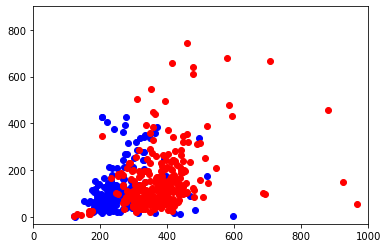

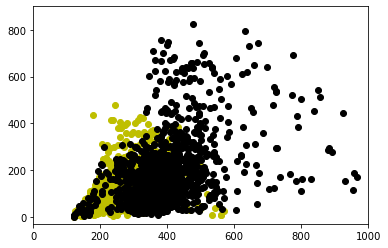

In [23]:
plt.scatter(yall[:,0],yall[:,3],color='b')
plt.scatter(yiall[:,0],yiall[:,3],color='r')
plt.xlim(0,1000)
plt.ylim(-30,900)
plt.show()
plt.scatter(yallo[:,0],yallo[:,3],color='y')
plt.scatter(yiallo[:,0],yiallo[:,3],color='k')
plt.xlim(0,1000)
plt.ylim(-30,900)
plt.show()

In [24]:
def diffsub(data,datai,conin,idin):
    datamean=np.zeros((len(data[:,0]),len(datai[:,0])))
    datamax=np.zeros((len(data[:,0]),len(datai[:,0])))
    datamin=np.zeros((len(data[:,0]),len(datai[:,0])))
    datarange=np.zeros((len(data[:,0]),len(datai[:,0])))
    for i in range(len(data[:,0])):
        datamean[i,:]=np.abs(datai[:,0]-data[i,0])
        datamax[i,:]=np.abs(datai[:,1]-data[i,1])
        datamin[i,:]=np.abs(datai[:,2]-data[i,2])
        datarange[i,:]=np.abs(datai[:,3]-data[i,3])
    datameano=datamean.reshape(len(data[:,0])*len(datai[:,0]),1)
    datamaxo=datamax.reshape(len(data[:,0])*len(datai[:,0]),1)
    datamino=datamin.reshape(len(data[:,0])*len(datai[:,0]),1)
    datarangeo=datarange.reshape(len(data[:,0])*len(datai[:,0]),1)
    ind=np.zeros(len(data[:,0])*len(datai[:,0]))+idin
    con=np.zeros(len(data[:,0])*len(datai[:,0]))+conin
    dataoutme=np.c_[datameano,con,ind]
    dataoutma=np.c_[datamaxo,con,ind]
    dataoutmi=np.c_[datamino,con,ind]
    dataoutr=np.c_[datarangeo,con,ind]
    return dataoutme, dataoutma, dataoutmi,dataoutr

In [25]:
outme1,outma1,outmi1,outr1=diffsub(yout1,youti1,0,1)
outme2,outma2,outmi2,outr2=diffsub(yout2,youti2,0,2)
outme3,outma3,outmi3,outr3=diffsub(yout3,youti3,0,3)
outme4,outma4,outmi4,outr4=diffsub(yout4,youti4,0,4)
outme5,outma5,outmi5,outr5=diffsub(yout5,youti5,0,5)
outme6,outma6,outmi6,outr6=diffsub(yout6,youti6,0,6)
outme7,outma7,outmi7,outr7=diffsub(yout7,youti7,0,7)
outme8,outma8,outmi8,outr8=diffsub(yout8,youti8,0,8)
outme9,outma9,outmi9,outr9=diffsub(yout9,youti9,0,9)

In [26]:
outme1o,outma1o,outmi1o,outr1o=diffsub(yout1c,youti1c,1,1)
outme2o,outma2o,outmi2o,outr2o=diffsub(yout2c,youti2c,1,2)
outme3o,outma3o,outmi3o,outr3o=diffsub(yout3c,youti3c,1,3)
outme4o,outma4o,outmi4o,outr4o=diffsub(yout4c,youti4c,1,4)
outme5o,outma5o,outmi5o,outr5o=diffsub(yout5c,youti5c,1,5)
outme6o,outma6o,outmi6o,outr6o=diffsub(yout6c,youti6c,1,6)
outme7o,outma7o,outmi7o,outr7o=diffsub(yout7c,youti7c,1,7)
outme8o,outma8o,outmi8o,outr8o=diffsub(yout8c,youti8c,1,8)
outme9o,outma9o,outmi9o,outr9o=diffsub(yout9c,youti9c,1,9)

In [27]:
datame=np.r_[outme1,outme2,outme6,outme7,outme8,outme9,outme1o,outme2o,outme6o,outme7o,outme8o,outme9o]
datama=np.r_[outma1,outma2,outma6,outma7,outma8,outma9,outma1o,outma2o,outma6o,outma7o,outma8o,outma9o]
datami=np.r_[outmi1,outmi2,outmi6,outmi7,outmi8,outmi9,outmi1o,outmi2o,outmi6o,outmi7o,outmi8o,outmi9o]
datar=np.r_[outr1,outr2,outr6,outr7,outr8,outr9,outr1o,outr2o,outr6o,outr7o,outr8o,outr9o]

In [34]:
datame=np.r_[outme1,outme2,outme6,outme7,outme8,outme9]
datama=np.r_[outma1,outma2,outma6,outma7,outma8,outma9]
datami=np.r_[outmi1,outmi2,outmi6,outmi7,outmi8,outmi9]
datar=np.r_[outr1,outr2,outr6,outr7,outr8,outr9]

datameo=np.r_[outme1o,outme2o,outme6o,outme7o,outme8o,outme9o]
datamao=np.r_[outma1o,outma2o,outma6o,outma7o,outma8o,outma9o]
datamio=np.r_[outmi1o,outmi2o,outmi6o,outmi7o,outmi8o,outmi9o]
dataro=np.r_[outr1o,outr2o,outr6o,outr7o,outr8o,outr9o]

In [36]:
np.savetxt(r'C:\LJR\paper\pictures\meanm.txt',datames)
np.savetxt(r'C:\LJR\paper\pictures\maxm.txt',datamas)
np.savetxt(r'C:\LJR\paper\pictures\minm.txt',datamis)
np.savetxt(r'C:\LJR\paper\pictures\rangem.txt',datars)

In [37]:
np.savetxt(r'C:\LJR\paper\pictures\meanmo.txt',datameo)
np.savetxt(r'C:\LJR\paper\pictures\maxmo.txt',datamao)
np.savetxt(r'C:\LJR\paper\pictures\minmo.txt',datamio)
np.savetxt(r'C:\LJR\paper\pictures\rangemo.txt',dataro)

In [42]:
print(np.mean(datame,axis=0),np.mean(datameo,axis=0))
print(np.mean(datama,axis=0),np.mean(datamao,axis=0))
print(np.mean(datami,axis=0),np.mean(datamio,axis=0))
print(np.mean(datar,axis=0),np.mean(dataro,axis=0))

[149.42177484   0.           7.13635177] [151.84898537   1.           6.1716239 ]
[192.21965342   0.           7.13635177] [194.1762713   1.          6.1716239]
[119.83890708   0.           7.13635177] [125.83226331   1.           6.1716239 ]
[111.19826628   0.           7.13635177] [121.87696201   1.           6.1716239 ]


In [28]:
datamep=pd.DataFrame(datame)
datamep.columns=['DV','IV','type']
datamap=pd.DataFrame(datama)
datamap.columns=['DV','IV','type']
datamip=pd.DataFrame(datami)
datamip.columns=['DV','IV','type']
datarp=pd.DataFrame(datar)
datarp.columns=['DV','IV','type']

In [43]:
med=smf.mixedlm("DV~IV",datamep,groups=datamep['type'])
medf = med.fit(method=['powell'])

mad=smf.mixedlm("DV~IV",datamap,groups=datamap['type'])
madf = mad.fit(method=['powell'])

mid=smf.mixedlm("DV~IV",datamip,groups=datamip['type'])
midf = mid.fit(method=['powell'])

rd=smf.mixedlm("DV~IV",datarp,groups=datarp['type'])
rdf = rd.fit(method=['powell'])

In [44]:
print(medf.summary())
print(madf.summary())
print(midf.summary())
print(rdf.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV           
No. Observations: 184710  Method:             REML         
No. Groups:       6       Scale:              10612.5749   
Min. group size:  18510   Log-Likelihood:     -1118222.7361
Max. group size:  46001   Converged:          Yes          
Mean group size:  30785.0                                  
-----------------------------------------------------------
              Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept     141.167   13.550 10.418 0.000 114.609 167.725
IV              8.119    0.935  8.685 0.000   6.287   9.951
Group Var    1096.791    6.771                             

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: DV           
No. Observations: 184710  Method:             REML         
No. Groups:       6       Scale:              24367.5311   
M

In [ ]:
disall,pathall=fastdtw(yall[:,0],yiall[:,0],dist=euclidean)
disallo,pathallo=fastdtw(yallo[:,0],yiallo[:,0],dist=euclidean)
print(disall/(len(yall)+len(yiall)),disallo/(len(yallo)+len(yiallo)))

In [ ]:
disall,pathall=fastdtw(yall[:,1],yiall[:,1],dist=euclidean)
disallo,pathallo=fastdtw(yallo[:,1],yiallo[:,1],dist=euclidean)
print(disall/(len(yall)+len(yiall)),disallo/(len(yallo)+len(yiallo)))

In [ ]:
disall,pathall=fastdtw(yall[:,2],yiall[:,2],dist=euclidean)
disallo,pathallo=fastdtw(yallo[:,2],yiallo[:,2],dist=euclidean)
print(disall/(len(yall)+len(yiall)),disallo/(len(yallo)+len(yiallo)))

In [ ]:
disall,pathall=fastdtw(yall[:,3],yiall[:,3],dist=euclidean)
disallo,pathallo=fastdtw(yallo[:,3],yiallo[:,3],dist=euclidean)
print(disall/(len(yall)+len(yiall)),disallo/(len(yallo)+len(yiallo)))

In [ ]:
len(yall)

In [ ]:
print(stats.pearsonr(yall[:,1],yiall[:,1]))
print(stats.pearsonr(yallc[:,1],yiallc[:,1]))

In [ ]:
print(stats.pearsonr(yall[:,2],yiall[:,2]))
print(stats.pearsonr(yallc[:,2],yiallc[:,2]))

In [ ]:
print(stats.pearsonr(yall[:,3],yiall[:,3]))
print(stats.pearsonr(yallc[:,3],yiallc[:,3]))

In [ ]:
plt.scatter(yall[:,1],yiall[:,1])

In [ ]:
def aligncon(y,yi,featurenum):
    yalltest=np.zeros((39600,1))-20
    y1mean=y[:,featurenum]
    y1imean=yi[:,featurenum]
    yalltest[np.where(y1mean!=-20),0]=y1mean[np.where(y1mean!=-20)].ravel()
    yalltest[np.where(y1imean!=-40),0]=y1imean[np.where(y1imean!=-40)].ravel()
    indtest=np.where(yalltest!=-20)
    indtest0=indtest[0]
    con=1
    constarttime=[]
    conendtime=[]
    constarttime.append(indtest0[0])
    for i in range(len(indtest0)-1):
        difh=indtest0[i+1]-indtest0[i]
        if difh>=3600:
            con=con+1
            conendtime.append(indtest0[i])
            constarttime.append(indtest0[i+1])
    conendtime.append(indtest0[-1])
    aligncon=[]
    alignp=[]
    for i in range(con):
        y1meant=y1mean[constarttime[i]-1:conendtime[i]+2]
        print(constarttime[i],conendtime[i])
        y1ttt=y1meant[np.where(y1meant!=-20)]
        y1imeant=y1imean[constarttime[i]-1:conendtime[i]+2]
        y1ittt=y1imeant[np.where(y1imeant!=-40)]
        print(len(y1ttt),len(y1ittt))
        if len(y1ttt)>2:
            corr=stats.pearsonr(y1ttt,y1ittt)
            print(corr)
            aligncon.append(corr[0])
            alignp.append(corr[1])
    return aligncon,alignp

In [ ]:
align1,alignp1=aligncon(yout1,youti1,0)
align2,alignp2=aligncon(yout2,youti2,0)
align3,alignp3=aligncon(yout3,youti3,0)
align4,alignp4=aligncon(yout4,youti4,0)
align5,alignp5=aligncon(yout5,youti5,0)
align6,alignp6=aligncon(yout6,youti6,0)
align7,alignp7=aligncon(yout7,youti7,0)
align8,alignp8=aligncon(yout8,youti8,0)
align9,alignp9=aligncon(yout9,youti9,0)

In [ ]:
ytest=yout2[29308:31723,0]
print(ytest[np.where(yout2[29308:31723,0]!=-20)])
ytest=youti2[29308:31723,0]
print(ytest[np.where(youti2[29308:31723,0]!=-40)])